In [1]:
import calendar
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

plt.style.use('seaborn-darkgrid')

In [2]:
# Source: Global Monitoring Laboratory, NOAA

# Global Monthly Mean CO2
co2_mm_gl = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.txt"

# Daily Global CO2
co2_trend_gl = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_trend_gl.txt"

In [3]:
# Read the Global Monthly Mean CO2 file
co2_mm_gl_df = pd.read_csv(co2_mm_gl, 
                         sep=r"\s+", 
                         comment='#', 
                         names=["year",
                                "month", 
                                "decimal", 
                                "average", 
                                "trend"])

In [4]:
co2_mm_gl_df["date_text"] = co2_mm_gl_df.apply(lambda r: "{} {}".format(calendar.month_name[int(r["month"])], 
                       int(r["year"])), axis=1)

In [5]:
# Get the most up-to-date Global Monthly Mean of CO2 reading
last_month = co2_mm_gl_df.iloc[-1]

# ...and compare it with that of the previous year
prev_year = co2_mm_gl_df[co2_mm_gl_df["decimal"] == last_month["decimal"] - 1]

In [6]:
boxtext = ""
boxtext += "{}: {} ppm\n".format(last_month["date_text"], 
                              last_month["average"])
boxtext += "{}: {} ppm".format(prev_year["date_text"].item(), 
                            prev_year["average"].item())

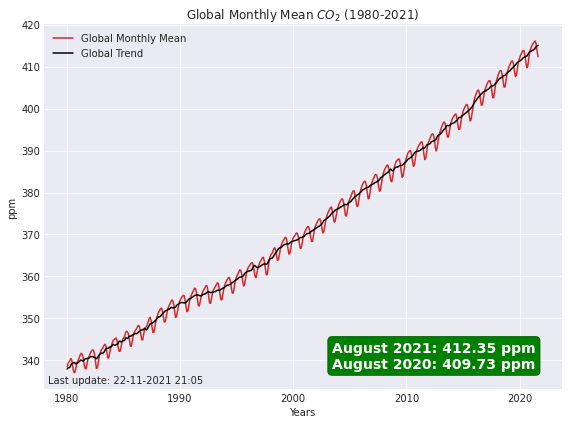

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(co2_mm_gl_df["decimal"], co2_mm_gl_df["average"], c="tab:red")
ax.plot(co2_mm_gl_df["decimal"], co2_mm_gl_df["trend"], c="k")
min_year = min(co2_mm_gl_df["year"])
max_year = max(co2_mm_gl_df["year"])
ax.set_title(f"Global Monthly Mean $CO_{2}$ ({min_year}-{max_year})")
ax.set_xlabel("Years")
ax.set_ylabel("ppm")
ax.text(0.95, 0.05, boxtext,
        horizontalalignment='right', 
        color='white',
        fontsize=14,
        fontweight='bold',
        verticalalignment='bottom',
        bbox=dict(facecolor="green", 
                  edgecolor="darkgreen", 
                  boxstyle='round'),
        transform=ax.transAxes)

# Add last update date
last_update = datetime.today().strftime("%d-%m-%Y %H:%M")
last_update_at = AnchoredText(f"Last update: {last_update}",
                        borderpad=0., 
                        frameon=False, 
                        loc=3)
ax.add_artist(last_update_at)
ax.legend(["Global Monthly Mean", "Global Trend"])
ax.grid(color="white")
plt.tight_layout()
plt.show()

In [8]:
# Read the Global daily CO2 file
co2_trend_gl_df = pd.read_csv(co2_trend_gl, 
                        sep=r"\s+", 
                        comment='#', 
                        names=["year", 
                               "month", 
                               "day", 
                               "cycle", 
                               "trend"])

In [9]:
# Create a Datetime column from year, month, day
co2_trend_gl_df["date"] = pd.to_datetime(co2_trend_gl_df[['year', 
                                              'month', 
                                              'day']])

co2_trend_gl_df["date_str"] = co2_trend_gl_df.apply(lambda r: "{} {}".format(calendar.month_name[int(r["month"])], 
                       int(r["day"])), axis=1)

In [10]:
# Get the last 5 days
last_5days_co2 = co2_trend_gl_df.tail(5)

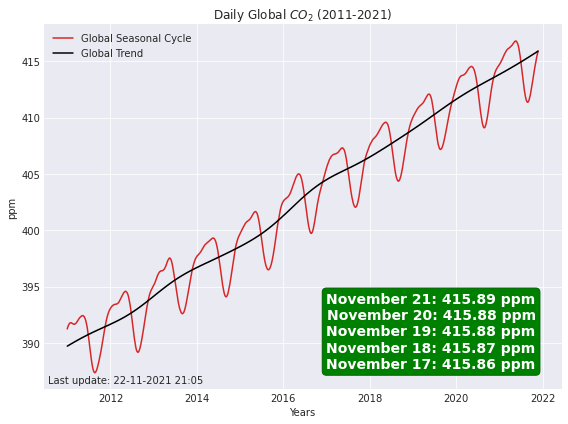

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(co2_trend_gl_df["date"], co2_trend_gl_df["cycle"], c="tab:red")
ax.plot(co2_trend_gl_df["date"], co2_trend_gl_df["trend"], c="k")
min_year = min(co2_trend_gl_df["year"])
max_year = max(co2_trend_gl_df["year"])
ax.set_title(f"Daily Global $CO_{2}$ ({min_year}-{max_year})")
ax.set_xlabel("Years")
ax.set_ylabel("ppm")

boxtext = ""
for idx, row in last_5days_co2[::-1].iterrows():
    if idx == last_5days_co2.index[0]:
        boxtext += "{}: {} ppm".format(row["date_str"], row["trend"])
    else:
        boxtext += "{}: {} ppm\n".format(row["date_str"], row["trend"])

ax.text(0.95, 0.05, boxtext,
        horizontalalignment='right', 
        color='white',
        fontsize=14,
        fontweight='bold',
        verticalalignment='bottom',
        bbox=dict(facecolor="green", 
                  edgecolor="darkgreen", 
                  boxstyle='round'),
        transform=ax.transAxes)
# Add last update date
last_update = datetime.today().strftime("%d-%m-%Y %H:%M")
last_update_at = AnchoredText(f"Last update: {last_update}",
                        borderpad=0., 
                        frameon=False, 
                        loc=3)
ax.add_artist(last_update_at)
ax.legend(["Global Seasonal Cycle", "Global Trend"])
ax.grid(color="white")
plt.tight_layout()
plt.savefig("09_DailyGlobalCO2.jpg", dpi=300, bbox_inches='tight')
plt.show()